In [1]:
# Notebook to plot the old (RMG GAV) and new (My DFT) estimates of the thermo for species 85

In [1]:
import os
import pickle
import numpy as np

import rmgpy.species
import rmgpy.chemkin
import rmgpy.data.thermo


import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def plot_species_uncertainties(species, uncertainties, labels=None):
    if not type(species) == list:
        species = [species]
    if not type(uncertainties) == list:
        uncertainties = [uncertainties]
    
    if not labels:
        labels = [sp.label for sp in species]
    
    plt.title('Species Uncertainty x10')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Gibbs Free Energy (kJ/mol)')
    T = np.linspace(300, 3000, 1001)
    for j, sp in enumerate(species):
        G = np.zeros(len(T))
        for i in range(0, len(T)):
            G[i] = sp.get_free_energy(T[i]) / 1000.0
        
        plt.plot(T, G, label=labels[j])

        upper_bound = G + 10* uncertainties[j]
        lower_bound = G - 10*uncertainties[j]
        plt.fill_between(T, lower_bound, y2=upper_bound, step="pre", alpha=0.4, color='tab:blue', label=None)
    
    plt.legend()
    plt.show()

In [3]:
# Load the base model and the covariance matrix
basedir = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/rmg_model'

base_chemkin = os.path.join(basedir, 'chem_annotated.inp')
dictionary = os.path.join(basedir, 'species_dictionary.txt')
transport = os.path.join(basedir, 'tran.dat')

species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(base_chemkin, dictionary_path=dictionary, transport_path=transport)

covariance_file = '/work/westgroup/harris.se/autoscience/autoscience/debug/thermo85/total_covariance_matrix.pickle'
with open(covariance_file, 'rb') as handle:
    Sigma_G = pickle.load(handle)


In [4]:
# load the new thermo estimate
DFT_DIR = "/work/westgroup/harris.se/autoscience/autoscience/butane/dft/"

thermo_lib = os.path.join(DFT_DIR, 'thermo', 'thermo')
ark_thermo_database = rmgpy.data.thermo.ThermoDatabase()
ark_thermo_database.load_libraries(thermo_lib)
print(f'{len(ark_thermo_database.libraries["harris_butane"].entries)} entries')

for key in ark_thermo_database.libraries['harris_butane'].entries.keys():
    entry = ark_thermo_database.libraries['harris_butane'].entries[key]
    if entry.item.smiles == species_list[85].smiles:
        break
        
dft_sp = rmgpy.species.Species(smiles=species_list[85].smiles)
dft_sp.thermo = entry.data
print(dft_sp)

92 entries
CC(CCOO)OO


In [7]:
# uncertainty estimate by hand:
# {'GAV': {'group': [(<Entry index=2335 label="O2s-OsCs">, 2),
#    (<Entry index=2317 label="O2s-OsH">, 2),
#    (<Entry index=1908 label="Cs-CsCsOsH">, 1),
#    (<Entry index=953 label="Cs-CsCsHH">, 1),
#    (<Entry index=1952 label="Cs-CsOsHH">, 1),
#    (<Entry index=921 label="Cs-CsHHH">, 1)]}}

group_uncertainty = 0.1
uncertainty_85 = 1.5 + group_uncertainty * (2 + 1 + 1 + 1 + 1)
print(uncertainty_85)

2.1


CC(CCOO)OO(787)


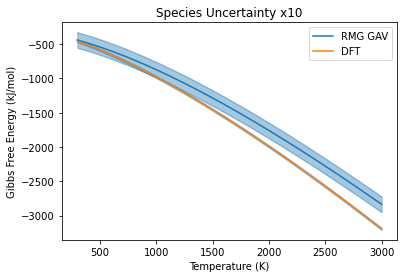

In [12]:
# plot the original uncertainty
print(species_list[85])
uncertainty_GAV = Sigma_G[85, 85] * 4.184  # convert kcal/mol to kJ/mol
plot_species_uncertainties([species_list[85], dft_sp], [uncertainty_GAV, 1.5], labels=['RMG GAV', 'DFT'])

In [25]:
Sigma_G[85, 85]

2.7

In [6]:
Sigma_G[0,0]

1.5

In [15]:
species_list[0].label

'N2'

In [13]:
dir(species_list[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_molecular_weight',
 '_repr_png_',
 'aug_inchi',
 'calculate_cp0',
 'calculate_cpinf',
 'conformer',
 'contains_surface_site',
 'copy',
 'creation_iteration',
 'energy_transfer_model',
 'explicitly_allowed',
 'fingerprint',
 'from_adjacency_list',
 'from_smiles',
 'generate_aug_inchi',
 'generate_energy_transfer_model',
 'generate_resonance_structures',
 'generate_statmech',
 'generate_transport_data',
 'get_augmented_inchi',
 'get_density_of_states',
 'get_enthalpy',
 'get_entropy',
 'get_free_energy',
 'get_heat_capacity',
 'get_henry_law_constant_data',
 'get_liquid_volumetric_mass_transfer_coefficient_data',
 'get_partition_function',
 'get_

In [ ]:
plot_reaction_uncertainty

In [12]:
def plot_thermos(thermos, labels=None):
    %matplotlib inline
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 3000, 1001)
    for thermo in thermos:
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H)
        ax[1].plot(T, S)
        ax[2].plot(T, Cp)
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [5]:
# Load the base model
basedir = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/rmg_model'
base_chemkin = os.path.join(basedir, 'chem_annotated.inp')
dictionary = os.path.join(basedir, 'species_dictionary.txt')
transport = os.path.join(basedir, 'tran.dat')
species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(base_chemkin, dictionary_path=dictionary, transport_path=transport)
print(f'{len(species_list)} species, {len(reaction_list)} reactions')


110 species, 1822 reactions


In [6]:
# Load the new thermo library
DFT_DIR = "/work/westgroup/harris.se/autoscience/autoscience/butane/dft/"
thermo_lib = os.path.join(DFT_DIR, 'thermo', 'thermo')
ark_thermo_database = rmgpy.data.thermo.ThermoDatabase()
ark_thermo_database.load_libraries(thermo_lib)
print(f'{len(ark_thermo_database.libraries["harris_butane"].entries)} entries')

92 entries


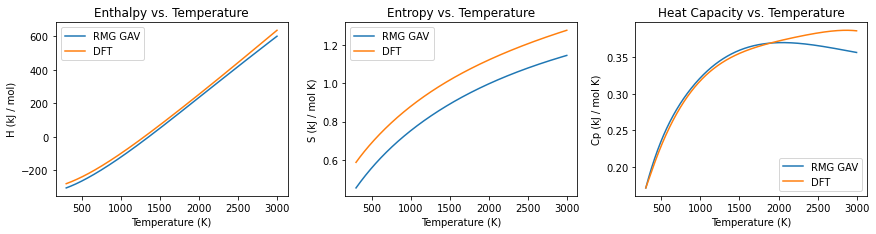

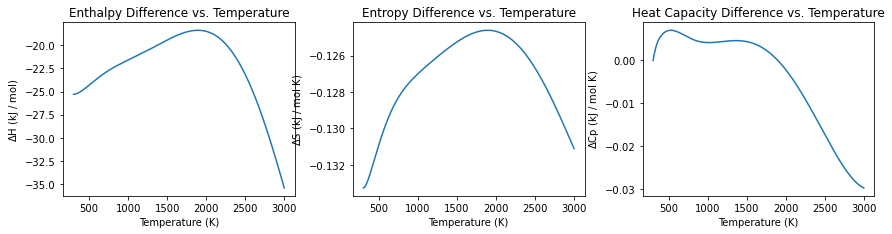

In [7]:
# stitch each of the library thermos into the mechanism
plot_index = 85

species = species_list[plot_index]

for key in ark_thermo_database.libraries['harris_butane'].entries.keys():
    entry = ark_thermo_database.libraries['harris_butane'].entries[key]

    if entry.item.smiles == species_list[plot_index].smiles:
        plot_thermos([species_list[plot_index], entry.data], ['RMG GAV', 'DFT'])
        plot_thermo_diff(species_list[plot_index], entry.data)
        break

In [ ]:
# make a copy to perturb
